In [1]:
# Dataset from github
!git clone https://github.com/zalandoresearch/fashion-mnist.git

Cloning into 'fashion-mnist'...
remote: Enumerating objects: 762, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 762 (delta 0), reused 2 (delta 0), pack-reused 758
Receiving objects: 100% (762/762), 105.85 MiB | 33.85 MiB/s, done.
Resolving deltas: 100% (444/444), done.


In [2]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Normalizing the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [5]:
# Reshaping the input data
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)


In [6]:
# Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [7]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
938/938 [==============================] - 10s 5ms/step - loss: 0.9421 - accuracy: 0.6719 - val_loss: 0.5707 - val_accuracy: 0.7888
Epoch 2/50
938/938 [==============================] - 3s 4ms/step - loss: 0.5642 - accuracy: 0.8018 - val_loss: 0.4700 - val_accuracy: 0.8342
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.4831 - accuracy: 0.8300 - val_loss: 0.4330 - val_accuracy: 0.8451
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.4443 - accuracy: 0.8427 - val_loss: 0.4167 - val_accuracy: 0.8486
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.4180 - accuracy: 0.8513 - val_loss: 0.3995 - val_accuracy: 0.8538
Epoch 6/50
938/938 [==============================] - 3s 4ms/step - loss: 0.3971 - accuracy: 0.8569 - val_loss: 0.3865 - val_accuracy: 0.8621
Epoch 7/50
938/938 [==============================] - 3s 4ms/step - loss: 0.3815 - accuracy: 0.8630 - val_loss: 0.3738 - val_accuracy: 0.8652
Epoch

In [9]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test loss: {test_loss:.2f}')


Test accuracy: 0.89
Test loss: 0.32


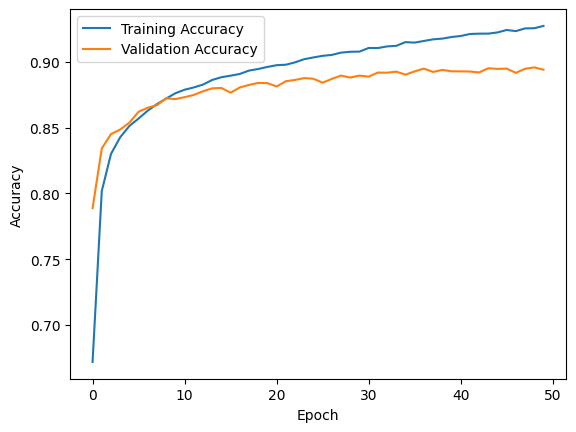

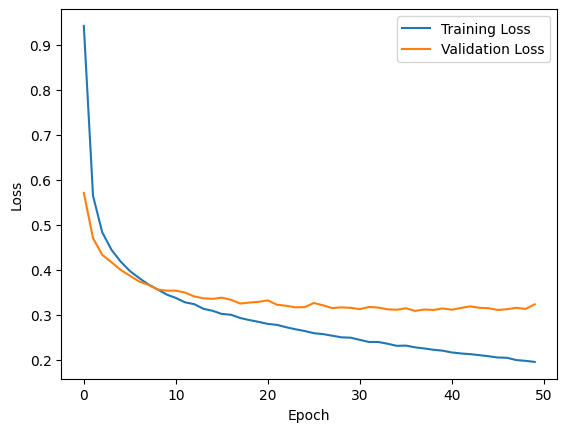

In [10]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
